In [216]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [217]:
data = pd.read_csv('/content/drive/MyDrive/王/pois/2.csv', header=None)

In [218]:
data

,0,1,2,3,4,5,6,7,8,9
0,116.410829,39.881913,天坛公园,B000A81CB2,北京市,110101,4.9,639,10.0,8
1,116.417296,39.947239,雍和宫,B000A7BGMG,北京市,110101,4.9,200,25.0,2
2,116.397455,39.909187,天安门,B000A60DA1,北京市,110101,5.0,240,0.0,2
3,116.016802,40.356188,八达岭长城,B000A45467,北京市,110119,4.9,314,40.0,20
4,116.300960,40.008759,圆明园遗址公园,B000A16E89,北京市,110108,4.9,23,10.0,17
...,...,...,...,...,...,...,...,...,...,...
5829,113.546787,22.196020,曹黄二仙庙,B0FFL9R0F1,澳门特别行政区,820002,2.9,353,0.0,14
5830,113.547814,22.184459,金银岛名胜世界,B0J1TZC74Q,澳门特别行政区,820004,4.3,341,0.0,3
5831,113.545883,22.194627,大三巴牌坊,B073D00ASB,澳门特别行政区,820002,4.8,191,0.0,0
5832,113.545743,22.194831,哪咤庙,B073D00ASC,澳门特别行政区,820002,4.4,95,0.0,15


In [219]:
data_columns = ['Longitude', 'latitude', 'name', 'ID', 'city', 'area_id', 'rating', 'heat', 'cost', 'time']
data.columns = data_columns

In [220]:
rating_column = data.pop('rating')

data['rating'] = rating_column

In [221]:
data

,Longitude,latitude,name,ID,city,area_id,heat,cost,time,rating
0,116.410829,39.881913,天坛公园,B000A81CB2,北京市,110101,639,10.0,8,4.9
1,116.417296,39.947239,雍和宫,B000A7BGMG,北京市,110101,200,25.0,2,4.9
2,116.397455,39.909187,天安门,B000A60DA1,北京市,110101,240,0.0,2,5.0
3,116.016802,40.356188,八达岭长城,B000A45467,北京市,110119,314,40.0,20,4.9
4,116.300960,40.008759,圆明园遗址公园,B000A16E89,北京市,110108,23,10.0,17,4.9
...,...,...,...,...,...,...,...,...,...,...
5829,113.546787,22.196020,曹黄二仙庙,B0FFL9R0F1,澳门特别行政区,820002,353,0.0,14,2.9
5830,113.547814,22.184459,金银岛名胜世界,B0J1TZC74Q,澳门特别行政区,820004,341,0.0,3,4.3
5831,113.545883,22.194627,大三巴牌坊,B073D00ASB,澳门特别行政区,820002,191,0.0,0,4.8
5832,113.545743,22.194831,哪咤庙,B073D00ASC,澳门特别行政区,820002,95,0.0,15,4.4


### 预处理

In [222]:
data = data.drop('ID', axis=1)

In [223]:
data = data.drop_duplicates(subset='name', keep='first')
data.set_index('name', inplace=True)
data.index.name = None

In [224]:
data

,Longitude,latitude,city,area_id,heat,cost,time,rating
天坛公园,116.410829,39.881913,北京市,110101,639,10.0,8,4.9
雍和宫,116.417296,39.947239,北京市,110101,200,25.0,2,4.9
天安门,116.397455,39.909187,北京市,110101,240,0.0,2,5.0
八达岭长城,116.016802,40.356188,北京市,110119,314,40.0,20,4.9
圆明园遗址公园,116.300960,40.008759,北京市,110108,23,10.0,17,4.9
...,...,...,...,...,...,...,...,...
曹黄二仙庙,113.546787,22.196020,澳门特别行政区,820002,353,0.0,14,2.9
金银岛名胜世界,113.547814,22.184459,澳门特别行政区,820004,341,0.0,3,4.3
大三巴牌坊,113.545883,22.194627,澳门特别行政区,820002,191,0.0,0,4.8
哪咤庙,113.545743,22.194831,澳门特别行政区,820002,95,0.0,15,4.4


In [225]:
data['city'].value_counts()

新疆维吾尔自治区    222
福建省         214
浙江省         212
北京市         202
重庆市         202
安徽省         202
贵州省         201
台湾省         197
河南省         195
甘肃省         194
山西省         183
河北省         181
内蒙古自治区      173
香港特别行政区     170
黑龙江省        169
辽宁省         168
陕西省         163
吉林省         161
湖北省         157
云南省         157
广东省         151
江西省         148
广西壮族自治区     145
上海市         142
江苏省         139
山东省         138
四川省         137
湖南省         134
青海省         124
天津市         119
海南省         103
澳门特别行政区      77
宁夏回族自治区      58
西藏自治区        25
Name: city, dtype: int64

In [226]:
city_to_number = {
    '新疆维吾尔自治区': 1,
    '福建省': 2,
    '浙江省': 3,
    '北京市': 4,
    '重庆市': 5,
    '安徽省': 6,
    '贵州省': 7,
    '台湾省': 8,
    '河南省': 9,
    '甘肃省': 10,
    '山西省': 11,
    '河北省': 12,
    '内蒙古自治区': 13,
    '香港特别行政区': 14,
    '黑龙江省': 15,
    '辽宁省': 16,
    '陕西省': 17,
    '吉林省': 18,
    '湖北省': 19,
    '云南省': 20,
    '广东省': 21,
    '江西省': 22,
    '广西壮族自治区': 23,
    '上海市': 24,
    '江苏省': 25,
    '山东省': 26,
    '四川省': 27,
    '湖南省': 28,
    '青海省': 29,
    '天津市': 30,
    '海南省': 31,
    '澳门特别行政区': 32,
    '宁夏回族自治区': 33,
    '西藏自治区': 34
}

data['city'] = data['city'].replace(city_to_number)

In [227]:
data

,Longitude,latitude,city,area_id,heat,cost,time,rating
天坛公园,116.410829,39.881913,4,110101,639,10.0,8,4.9
雍和宫,116.417296,39.947239,4,110101,200,25.0,2,4.9
天安门,116.397455,39.909187,4,110101,240,0.0,2,5.0
八达岭长城,116.016802,40.356188,4,110119,314,40.0,20,4.9
圆明园遗址公园,116.300960,40.008759,4,110108,23,10.0,17,4.9
...,...,...,...,...,...,...,...,...
曹黄二仙庙,113.546787,22.196020,32,820002,353,0.0,14,2.9
金银岛名胜世界,113.547814,22.184459,32,820004,341,0.0,3,4.3
大三巴牌坊,113.545883,22.194627,32,820002,191,0.0,0,4.8
哪咤庙,113.545743,22.194831,32,820002,95,0.0,15,4.4


In [228]:
# 缺失值检查
print(data.isnull().sum())

Longitude    0
latitude     0
city         0
area_id      0
heat         0
cost         0
time         0
rating       0
dtype: int64


In [229]:
# 无穷大值检查
print((data == np.inf).sum())

Longitude    0
latitude     0
city         0
area_id      0
heat         0
cost         0
time         0
rating       0
dtype: int64


In [230]:
# 标准化
data_columns = ['Longitude', 'latitude', 'city', 'area_id', 'heat', 'cost', 'time', 'rating']
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data_columns)

In [231]:
data

,Longitude,latitude,city,area_id,heat,cost,time,rating
天坛公园,0.381902,0.995863,-1.188887,-1.575021,1.718432,-0.070414,0.461230,0.998875
雍和宫,0.382608,1.005024,-1.188887,-1.575021,-0.241321,0.325813,-0.625420,0.998875
天安门,0.380443,0.999688,-1.188887,-1.575021,-0.062756,-0.334565,-0.625420,1.124466
八达岭长城,0.338918,1.062375,-1.188887,-1.574927,0.267590,0.722039,2.634529,0.998875
圆明园遗址公园,0.369917,1.013651,-1.188887,-1.574985,-1.031472,-0.070414,2.091205,0.998875
...,...,...,...,...,...,...,...,...
曹黄二仙庙,0.069468,-1.484401,1.855484,2.143123,0.441691,-0.334565,1.547880,-1.512949
金银岛名胜世界,0.069580,-1.486022,1.855484,2.143134,0.388121,-0.334565,-0.444311,0.245328
大三巴牌坊,0.069369,-1.484596,1.855484,2.143123,-0.281498,-0.334565,-0.987636,0.873284
哪咤庙,0.069354,-1.484568,1.855484,2.143123,-0.710055,-0.334565,1.728988,0.370919


### 分割数据集

In [232]:
X = data.drop('rating', axis=1)
y = data['rating']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [234]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4022, 7) (4022,)
Testing set shape: (1341, 7) (1341,)


### 评估函数

In [235]:
def evaluate_predictions(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

### 决策树回归

In [236]:
tree_reg = DecisionTreeRegressor(random_state=25)

In [237]:
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)

In [238]:
evaluate_predictions(y_test, tree_pred)

MSE: 1.51
RMSE: 1.23
MAE: 0.71
R2 Score: -0.52


### 梯度提升数

In [239]:
gb_reg = GradientBoostingRegressor(random_state=25)

In [240]:
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

In [241]:
evaluate_predictions(y_test, gb_pred)

MSE: 0.73
RMSE: 0.85
MAE: 0.51
R2 Score: 0.26


### 随机森林

In [242]:
forest_reg = RandomForestRegressor(random_state=25)

In [243]:
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)

In [244]:
evaluate_predictions(y_test, forest_pred)

MSE: 0.79
RMSE: 0.89
MAE: 0.54
R2 Score: 0.20


### 特征重要性

In [245]:
importances = forest_reg.feature_importances_

In [246]:
features = X_train.columns

In [247]:
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

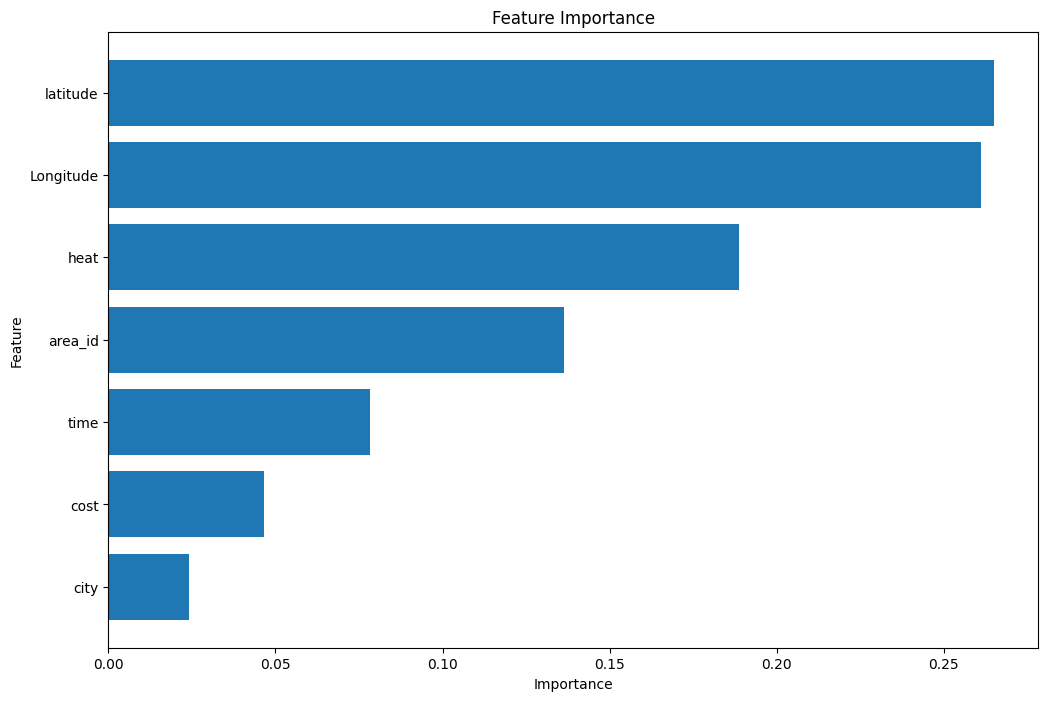

In [248]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### 重新进行预处理

In [249]:
data = data.drop('city', axis=1)
data = data.drop('cost', axis=1)
data = data.drop('time', axis=1)

In [251]:
data

,Longitude,latitude,area_id,heat,rating
天坛公园,0.381902,0.995863,-1.575021,1.718432,0.998875
雍和宫,0.382608,1.005024,-1.575021,-0.241321,0.998875
天安门,0.380443,0.999688,-1.575021,-0.062756,1.124466
八达岭长城,0.338918,1.062375,-1.574927,0.267590,0.998875
圆明园遗址公园,0.369917,1.013651,-1.574985,-1.031472,0.998875
...,...,...,...,...,...
曹黄二仙庙,0.069468,-1.484401,2.143123,0.441691,-1.512949
金银岛名胜世界,0.069580,-1.486022,2.143134,0.388121,0.245328
大三巴牌坊,0.069369,-1.484596,2.143123,-0.281498,0.873284
哪咤庙,0.069354,-1.484568,2.143123,-0.710055,0.370919


### 分割数据集

In [252]:
X = data.drop('rating', axis=1)
y = data['rating']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [254]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4022, 4) (4022,)
Testing set shape: (1341, 4) (1341,)


### 决策树回归

In [255]:
tree_reg = DecisionTreeRegressor(random_state=25)

In [256]:
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)

In [257]:
evaluate_predictions(y_test, tree_pred)

MSE: 1.65
RMSE: 1.29
MAE: 0.74
R2 Score: -0.67


### 梯度提升数

In [258]:
gb_reg = GradientBoostingRegressor(random_state=25)

In [259]:
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

In [260]:
evaluate_predictions(y_test, gb_pred)

MSE: 0.76
RMSE: 0.87
MAE: 0.53
R2 Score: 0.23


### 随机森林

In [261]:
forest_reg = RandomForestRegressor(random_state=25)

In [262]:
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)

In [263]:
evaluate_predictions(y_test, forest_pred)

MSE: 0.82
RMSE: 0.90
MAE: 0.56
R2 Score: 0.17


### 梯度提升树优化

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [266]:
# 定义搜索
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 执行搜索
grid_result = grid_search.fit(X_train, y_train)

# 结果
best_params = grid_result.best_params_
print("Best: %f using %s" % (grid_result.best_score_, best_params))

Best: -0.841569 using {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 300}


In [267]:
optimized_gb_reg = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=25
)

In [268]:
optimized_gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=3,
                          n_estimators=300, random_state=25)

In [269]:
y_pred = optimized_gb_reg.predict(X_test)

In [270]:
evaluate_predictions(y_test, y_pred)

MSE: 0.77
RMSE: 0.88
MAE: 0.54
R2 Score: 0.22
